![imagen con dos cerebros enfrentados, el de la izquierda azul y el de la derecha naranja de los que salen ramificaciones](../img/img_cabecera.PNG)

# Análisis exploratorio de datos sobre el comportamiento de personas introvertidas y extrovertidas

Los datos a analizar proceden de Kaggle. Su autor, Rakesh Kapilavayi, indica que los datos fueron recogidos de diferentes encuestas hechas con Google (*Google Forms*) para un proyecto de investigación universitario centrado en los rasgos de personalidad y en las tendencias de comportamiento de los estudiantes.

La base de datos está formada por ocho columnas clasificadas en:
- **Columnas categóricas:**
    - **Stage_fear:** indica si tienen o no pánico escénico.
    - **Drained_after_socializing:** indica si después de socializar se quedan agotados o no. 
    - **Personality:** indica si su personalidad es introvertida o extrovertida. Se trata de la columna objetivo (*target).

- **Columnas numéricas:**
    - **Time_spent_Alone:** tiempo que pasan solos en una escala de 0 a 11.
    - **Social_event_attendance:** asistencia a eventos sociales en una escala de 0 a 10.
    - **Going_outside:** frecuencia de salir fuera en una escala de 0 a 7.
    - **Friends_circle_size:** número de amigos cercanos.
    - **Post_frequency:** frecuencia de postear en redes sociales en una escala de 0 a 10.


    

### EDA - Estructura a seguir:
#### 0. Importaciones necesarias y carga de datos
#### 1. Información básica de los datos
#### 2. Revisión de nulos y duplicados
#### 3. Limpieza y transformación
#### 4. Análisis y visualizaciones

### 0. Importaciones necesarias y carga de datos

In [2]:
# Librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga del csv:
df = pd.read_csv('../data/personality_dataset.csv')

### 1. Información básica de los datos

Para comenzar con en el análisis, es necesario revisar su estructura para saber cuántas observaciones lo componen y que tipo de variables se incluyen. Para ello, se utilizan los métodos shape e info, con los cuales obtenemos información sobre el número de filas y columnas, así como su tipo y la presencia de valores nulos.

De este modo, observamos que el dataset esta formado por 2900 filas y 8 columnas. Entre ellas encontramos tres variables categóricas de tipo *objeto* y 5 variables numéricas de tipo *floats*. Cabe destacar la existencia de nulos en todas las columnas a excepción de *Personality*.

In [4]:
df.shape

(2900, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


A continuación, se muestran las primeras filas del datset para familiarizarnos con los datos que se van a trabajar. También se procede a separar las variables en categóricas y numéricas, así como a identificar la columna objetivo, que permitirá, en análisis futuros, predecir la personalidad de una persona en base al resto de características.

In [6]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [7]:
def clasificador_variables(df,target):
    numericas = []
    categoricas = []
    for i in df.columns:
        if i == target:
            target = i    
        elif (df[i].dtype in ['int64', 'float64']) and (i!= target ):
            numericas.append(i)  
        elif (i not in numericas) and (i != target):
            categoricas.append(i)
            
    return target,numericas, categoricas


In [8]:
target, numericas, categoricas = clasificador_variables(df, 'Personality')

In [9]:
print(f'Columna objetivo: {target}')
print(f'Columnas numéricas: {numericas}')
print(f'Columnas categóricas: {categoricas}')

Columna objetivo: Personality
Columnas numéricas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Columnas categóricas: ['Stage_fear', 'Drained_after_socializing']


Es necesario entender cómo se distribuyen las variables numéricas antes de llegar al análisis de comportamientos más complejos. Por lo que se utiliza el método *describe* para que nos proporcione información sobre la tendencia central (media y mediana), dispersión (desviación estándar), valores mínimos y máximos y los cuartiles que dividen la distribución.

De este modo, las principales conclusiones que obtenemos sobre dichas variables son las siguientes:
- **Time_spent_Alone**: su media y mediana presentan valores próximos por lo que no hay sesgo fuerte. Sin embargo, existe mucha variabilidad por lo que el comportamiento de los individuos indica diferencias importantes.
- **Social_event_attendance**: presenta una distribución sesgada ligeramente hacia abajo(mediana menor que la media). También hay mucha variabilidad, lo que indica perfiles distintos en la muestra.
- **Going_outside**: tiene una distribución equilibrada y con menor variabilidad que las anteriores, por lo que el comportamiento hacia salir fuera es más uniforme.
- **Friends_circle_size**: existe sesgo hacia valores superiores. Su alta variabilidad indica diferencias muy marcadas entre personas con círculos de amigos pequeños y grandes.
- **Post_frequency**: la mediana es mayor que la media, por lo que se obtiene un sesgo ligeramente positivo. La frecuencia de publicaciones es heterogénea, existiendo gran variabilidad a la hora de publicar.

Por lo tanto, destaca su gran variabilidad en todas las variables lo cual lo denota tanto su desviación estándar como sus rangos entre mínimos y máximos. En cuanto a su distribución, mayormente son simétricas a excepción de *Friends_circle_size* que es la que mayor sesgo presenta hacia valores altos. Todo esto refleja la heterogeneidad de comportamientos sociales que se analizará con posterioridad.

In [10]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


### 2. Revisión de nulos y duplicados

En este apartado nos centraremos en analizar la cantidad de nulos y duplicados y se decidirá si deben eliminarse, imputarse o dejarse sin modificar. Tratar nulos y duplicados evita la existencia de sesgos, permitiendo que el análisis sea más fiable y facilitando la correcta visualización.

#### 2.1 Valores nulos
Antes de tomar una decisión sobre el tratamiento de los valores nulos, debemos contabilizarlos y obtener su porcentaje por columna. 

A excepción de la columna objetivo que no presenta ningún valor nulo, el resto de variables muestran bajos porcentajes,ninguno superior el 3%. Por lo tanto, será necesario aplicar imputaciones para completar los datos faltantes.

In [11]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [12]:
(df.isna().mean()*100).round(2)

Time_spent_Alone             2.17
Stage_fear                   2.52
Social_event_attendance      2.14
Going_outside                2.28
Drained_after_socializing    1.79
Friends_circle_size          2.66
Post_frequency               2.24
Personality                  0.00
dtype: float64

#### 2.1 Valores duplicados
Al igual que en el caso anterior, también tenemos que tener en cuenta si existen filas duplicadas ya que su existencia provoca sesgos porque se pueden estar sobrerrepresentando ciertos valores y por ende, afecta a valores estadísticos como la media, la desviación estándar, etc

En este caso observamos que hay 388 duplicados, lo que supone un 13,38%. sin embargo, cabe destacar que en este dataset no son duplicados realmente sino personas que en la encuesta han registrado los mismo datos que otros. Por lo tanto, eliminarlos implicaría la pérdida de registros válidos.

In [13]:
duplicados = df.duplicated().sum()
porcentaje_duplicados = ((duplicados/len(df))*100).round(2)

print(f'Cantidad de duplicados = {duplicados}')
print(f'Porcentaje de duplicados = {porcentaje_duplicados}')

Cantidad de duplicados = 388
Porcentaje de duplicados = 13.38


In [14]:
df[df.duplicated()]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
47,10.0,Yes,1.0,2.0,Yes,2.0,0.0,Introvert
217,5.0,Yes,2.0,0.0,Yes,2.0,0.0,Introvert
246,9.0,Yes,0.0,1.0,Yes,2.0,1.0,Introvert
248,9.0,Yes,0.0,2.0,Yes,3.0,2.0,Introvert
254,7.0,Yes,0.0,0.0,Yes,3.0,2.0,Introvert
...,...,...,...,...,...,...,...,...
2884,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


### 3. Limpieza y transformación

El primer paso de limpieza es normalizar los títulos de las columnas convirtiéndolos todos a minúsculas. Esto evitará errores al referenciar columnas en futuras operaciones.

In [15]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['time_spent_alone', 'stage_fear', 'social_event_attendance',
       'going_outside', 'drained_after_socializing', 'friends_circle_size',
       'post_frequency', 'personality'],
      dtype='object')


Al haber realizado esta mofificacións será necesario ejecutar de nuevo la función definida con anterioridad *clasificador_variables* para obtener los nombres de las columnas modificados y realizar correctamente los siguientes pasos del análisis.

In [16]:
target, numericas, categoricas = clasificador_variables(df, 'personality')

print(f'Columna objetivo: {target}')
print(f'Columnas numéricas: {numericas}')
print(f'Columnas categóricas: {categoricas}')


Columna objetivo: personality
Columnas numéricas: ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size', 'post_frequency']
Columnas categóricas: ['stage_fear', 'drained_after_socializing']


#### 3.1 Variables categóricas

El primer paso a realizar es contar los valores de cada categoría. Esto nos permitirá ver la necesidad de normalizar los datos así como la existencia de valores únicos. Como la variable objetivo también presenta valores de este tipo crearemos una variable nueva para facilitar el análisis.

In [17]:
target_categoricas = [target] + categoricas

print(target_categoricas)

['personality', 'stage_fear', 'drained_after_socializing']


In [18]:
def contar_valores_categoricos(df,columnas):
    for i in columnas:
        print(f'Columna {i}:')
        print(df[i].value_counts(dropna = False))
        print('\n')

In [19]:
contar_valores_categoricos(df,target_categoricas)

Columna personality:
personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


Columna stage_fear:
stage_fear
No     1417
Yes    1410
NaN      73
Name: count, dtype: int64


Columna drained_after_socializing:
drained_after_socializing
No     1441
Yes    1407
NaN      52
Name: count, dtype: int64




En cuanto a las transformaciones de estas columnas, para noralizar los datos, también es recomendable pasarlo todo a minúscula y eliminar cualquier posible espacio que haya delante o detrás de los valores. Otro cambio que sería necesario para aplicar modelos predictivos sería pasar todo a 0 y 1. Sin embargo, para que las visualizaciones posteriores se vean con mayor claridad omitiremos este paso.

In [20]:
def normalizar_valores_categoricos (df,columnas):
    for i in columnas:
        df[i] = df[i].str.lower().str.strip()
    return df

In [21]:
df = normalizar_valores_categoricos(df,target_categoricas)

In [22]:
df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,no,4.0,6.0,no,13.0,5.0,extrovert
1,9.0,yes,0.0,0.0,yes,0.0,3.0,introvert
2,9.0,yes,1.0,2.0,yes,5.0,2.0,introvert
3,0.0,no,6.0,7.0,no,14.0,8.0,extrovert
4,3.0,no,9.0,4.0,no,8.0,5.0,extrovert


Una vez normalizados todos los datos, procedemos a ver los nulos en detalle para decidir por qué valor vamos a imputarlo. Para optimizar el código usaremos la función definida *contar_nulos*.

In [23]:
def contar_nulos(df,columnas):
    for i in columnas:
        nulos = df[i].isna().sum()
        print(f'Valores nulos de {i} = {nulos}')

In [24]:
contar_nulos(df,categoricas)

Valores nulos de stage_fear = 73
Valores nulos de drained_after_socializing = 52


Para ambas categorías se decide agruparlas según la columna objetivo y obtener así la distribución. A rasgos generales, las personas que tienen pánico escénico suelen ser introvertidas así como aquellas que se sienten agotadas después de socializar.

In [25]:
df.groupby('personality')['stage_fear'].value_counts(dropna = False)

personality  stage_fear
extrovert    no            1338
             yes            111
             NaN             42
introvert    yes           1299
             no              79
             NaN             31
Name: count, dtype: int64

In [26]:
df.groupby('personality')['drained_after_socializing'].value_counts(dropna = False)

personality  drained_after_socializing
extrovert    no                           1362
             yes                           111
             NaN                            18
introvert    yes                          1296
             no                             79
             NaN                            34
Name: count, dtype: int64

La siguiente cuestión que se plantea es si todas las personas que tienen pánico escénico se sienten agotadas al socializar y viceversa. Por lo que se agrupan ambas columnas en función de la personalidad.
Los valores obtenidos nos permiten confirmar que todos los estudiantes que se sienten agotados despues de socializar tienen pánico escénico y que todos aquellos que no se sienten agotados al socializar no lo tienen, por lo que podremos imputar valores nulos aplicando esta lógica en ambos sentidos.

In [27]:
df.groupby(['drained_after_socializing','stage_fear'])['personality'].value_counts()

drained_after_socializing  stage_fear  personality
no                         no          extrovert      1320
                                       introvert        79
yes                        yes         introvert      1266
                                       extrovert       111
Name: count, dtype: int64

In [28]:
df[(df['stage_fear'] == 'Yes')&(df['drained_after_socializing'] == 'No')]

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality


Antes de proceder a las transformaciones, vemos como se distribuyen los nulos dentro de la columna *drained_after_socializing* en función de los valores de la columna *stage_fear*. De este modo, se observa que la mayoría de ellos corresponden a aquellos que presentan pánico escénico.

In [29]:
stage_yes = df[(df['stage_fear'] == 'yes') & (df['drained_after_socializing'].isna())].shape[0]
stage_no = df[(df['stage_fear'] == 'no') & (df['drained_after_socializing'].isna())].shape[0]

print(f'Si "stage_fear" es "yes" hay {stage_yes} nulos de la columna "drained_after_socializing".')
print(f'Si "stage_fear" es "no" hay {stage_no} nulos de la columna "drained_after_socializing".')

Si "stage_fear" es "yes" hay 33 nulos de la columna "drained_after_socializing".
Si "stage_fear" es "no" hay 18 nulos de la columna "drained_after_socializing".


Aplicando la misma lógica, observamos que la mayoría de nulos también se encuentran en aquellos que se sienten agotados después de socializar.

In [30]:
drained_yes = df[(df['drained_after_socializing'] == 'yes') & (df['stage_fear'].isna())].shape[0]
drained_no = df[(df['drained_after_socializing'] == 'no') & (df['stage_fear'].isna())].shape[0]

print(f'Si "drained_after_socializing" es "yes" hay {drained_yes} nulos de la columna "stage_fear".')
print(f'Si "drained_after_socializing" es "no" hay {drained_no} nulos de la columna "stage_fear".')

Si "drained_after_socializing" es "yes" hay 30 nulos de la columna "stage_fear".
Si "drained_after_socializing" es "no" hay 42 nulos de la columna "stage_fear".


Por último, aplicamos los cambios siguiendo la lógica de si se siente agotado tiene pánico escénico y viceversa para ambas columnas y comprobamos si queda algún nulo para ver cómo lo tratamos.

In [31]:
# Transformaciones para stage_fear:
df.loc[(df['drained_after_socializing'] == 'yes') & (df['stage_fear'].isna()),'stage_fear'] = 'yes'
df.loc[(df['drained_after_socializing'] == 'no') & (df['stage_fear'].isna()),'stage_fear'] = 'no'

In [32]:
# Transformaciones para drained_after_socializing:
df.loc[(df['stage_fear'] == 'yes') & (df['drained_after_socializing'].isna()),'drained_after_socializing'] = 'yes'
df.loc[(df['stage_fear'] == 'no') & (df['drained_after_socializing'].isna()),'drained_after_socializing'] = 'no'

In [33]:
contar_nulos(df,categoricas)

Valores nulos de stage_fear = 1
Valores nulos de drained_after_socializing = 1


El resultado obtenido tras las imputaciones es un nulo en cada columna, lo cual se traduce en una sola fila con ambas columnas nulas. 

Como el patrón observado en los datos indica que la mayoría de los casos introvertidos presentan 'yes' en ambas columnas, se imputan estos valores para mantener la coherencia del dataset.

In [34]:
df.loc[df.stage_fear.isna()]

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
1517,4.0,NaN,3.0,0.0,NaN,2.0,0.0,introvert


In [35]:
df.loc[df['stage_fear'].isna() & df['drained_after_socializing'].isna(), 
       ['stage_fear', 'drained_after_socializing']] = 'yes'

In [36]:
contar_nulos(df,categoricas)

Valores nulos de stage_fear = 0
Valores nulos de drained_after_socializing = 0


#### 3.1 Variables numéricas

Al igual que con las variables categóricas es necesario observar sus valores estadísticos en función de la variable objetivo para decidir cual es la que vamos a imputar en los valores nulos.

En primer lugar observamos como la media y la mediana coinciden en todas las variables, lo que indica que al haberlos agrupados por *personality* conseguimos valores más homogéneos. Sin embargo, sí que existe diferencia entre la moda y estos valores ya que en datasets como este, que contiene escalas discretas y ordinales, es muy común que estos valores no coinciden.

In [37]:
def comparativa_media_mediana_moda(df,columnas,target):
    for i in columnas:
        print(f'Media de {i} según {target}:')
        print(df.groupby(target)[i].mean().round())
        print('\n')

        print(f'Mediana de {i} según {target}:')
        print(df.groupby(target)[i].agg(lambda x: x.median()))
        print('\n')
        
        print(f'Moda de {i} según {target}:')
        print(df.groupby(target)[i].agg(lambda x: x.mode()))
        print('\n---------------------------------------------------------\n')
    

In [38]:
comparativa_media_mediana_moda(df,numericas,target)

Media de time_spent_alone según personality:
personality
extrovert    2.0
introvert    7.0
Name: time_spent_alone, dtype: float64


Mediana de time_spent_alone según personality:
personality
extrovert    2.0
introvert    7.0
Name: time_spent_alone, dtype: float64


Moda de time_spent_alone según personality:
personality
extrovert    3.0
introvert    9.0
Name: time_spent_alone, dtype: float64

---------------------------------------------------------

Media de social_event_attendance según personality:
personality
extrovert    6.0
introvert    2.0
Name: social_event_attendance, dtype: float64


Mediana de social_event_attendance según personality:
personality
extrovert    6.0
introvert    2.0
Name: social_event_attendance, dtype: float64


Moda de social_event_attendance según personality:
personality
extrovert    4.0
introvert    2.0
Name: social_event_attendance, dtype: float64

---------------------------------------------------------

Media de going_outside según personality:
person

A partir del análisis previo, se opta por imputar a los valores nulos la mediana en función de la personalidad. Esta decisión se debe a que la mediana refleja mejor el comportamiento central de la distribución por cada tipo de personalidad mientras que la moda podría estar influida por repeticiones puntuales. 

In [39]:
def imputar_mediana_grupos(df,columnas,target):
    for i in columnas:
        df[i] = df.groupby(target)[i].transform(lambda x:x.fillna(x.median()))
    return df

In [40]:
df = imputar_mediana_grupos(df,numericas,target)

In [41]:
contar_nulos(df,numericas)

Valores nulos de time_spent_alone = 0
Valores nulos de social_event_attendance = 0
Valores nulos de going_outside = 0
Valores nulos de friends_circle_size = 0
Valores nulos de post_frequency = 0


Tras imputar la mediana por grupo de personalidad a los valores nulos, la media, la moda y mediana vemos han convergido hacia los mismos valores. este efecto era esperable ya que la imputación implica la repetición de muchos valores iguales, aumentando la frecuencia de ellos y por lo tanto la simetría de la distribución. De este modo podemos confirmar que la elección de la mediana era lo más adecuado, ya que no ha generado distorsiones en los datos.

In [42]:
comparativa_media_mediana_moda(df,numericas,target)

Media de time_spent_alone según personality:
personality
extrovert    2.0
introvert    7.0
Name: time_spent_alone, dtype: float64


Mediana de time_spent_alone según personality:
personality
extrovert    2.0
introvert    7.0
Name: time_spent_alone, dtype: float64


Moda de time_spent_alone según personality:
personality
extrovert    2.0
introvert    7.0
Name: time_spent_alone, dtype: float64

---------------------------------------------------------

Media de social_event_attendance según personality:
personality
extrovert    6.0
introvert    2.0
Name: social_event_attendance, dtype: float64


Mediana de social_event_attendance según personality:
personality
extrovert    6.0
introvert    2.0
Name: social_event_attendance, dtype: float64


Moda de social_event_attendance según personality:
personality
extrovert    6.0
introvert    2.0
Name: social_event_attendance, dtype: float64

---------------------------------------------------------

Media de going_outside según personality:
person

### 4. Análisis y visualizaciones

A continuación se ha dividido el análisis en función de si se va a analizar una variable, dos o más de dos de forma conjunta. Además se han propuesto una serie de preguntas que se irán respondiendo en cada apartado.

#### 4.1 Análisis Univariante

En este apartado se analizarán las variables de forma individual para contestar a las siguientes preguntas:
- ¿Está equilibrado el dataset en base a su columna objetivo?
- ¿Cómo se distribuyen las variables categóricas?
- Las variables numéricas, ¿siguen una distribución normal?
- ¿Existen valores atípicos en el número de amigos?

El primer paso para analizar nuestro dataset es ver si nuestra columna objetivo está balanceada o no. En este caso se observa que los valores recogidos son muy similares, siendo ligeramente mayores los pertenecientes al grupo de extrovertidos.

In [43]:
def pintar_grafico_barras_uni(df,columnas):
    for i in columnas:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=i)
        plt.title(f'Distribución de {i}')
        plt.show()

In [44]:
df.personality.value_counts(normalize = True)

personality
extrovert    0.514138
introvert    0.485862
Name: proportion, dtype: float64

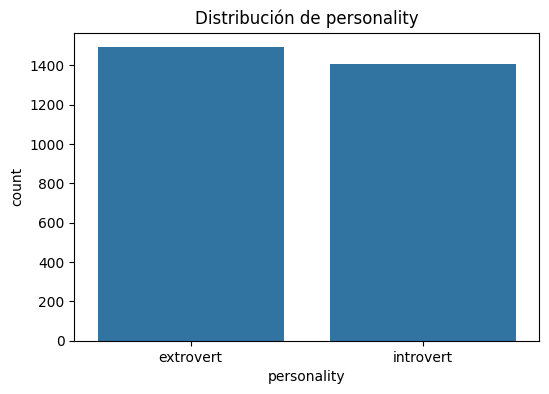

In [45]:
pintar_grafico_barras_uni(df,[target])

En cuanto a las variables categóricas obtenemos conclusiones muy similares, ya que como vimos con anterioridad estaban fuertemente correlacionadas. Ambas presentan distribuciones similares, por lo que volvemos a tener un dataset balanceado en ambas características.

In [46]:
df['stage_fear'].value_counts(normalize = True)

stage_fear
no     0.503103
yes    0.496897
Name: proportion, dtype: float64

In [47]:
df['drained_after_socializing'].value_counts(normalize = True)

drained_after_socializing
no     0.503103
yes    0.496897
Name: proportion, dtype: float64

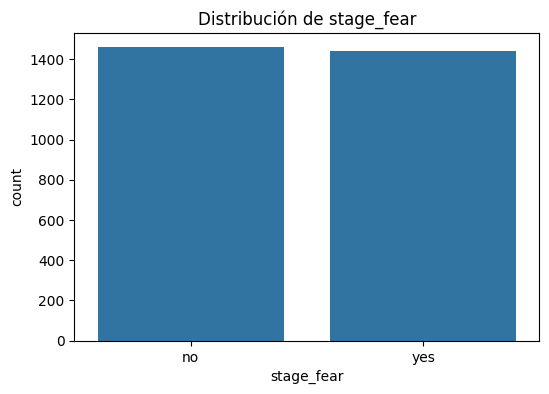

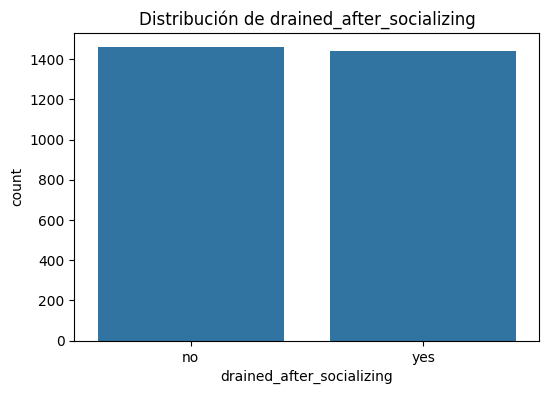

In [48]:
pintar_grafico_barras_uni(df,categoricas)

In [49]:
def pintar_distrib_num_uni(df,columnas):
    for i in columnas:
        plt.figure(figsize=(6,4))
        sns.histplot(df[i], bins=8, kde=True)
        plt.title(f'Distribución de {i}')
        plt.xlabel(i)
        plt.show()

En cuanto a la distribución de las columnas numéricas ninguna sigue una distribución normal. Por lo que si a futuro queremos aplicar modelos predictivos dberíamos normalizar estos datos.

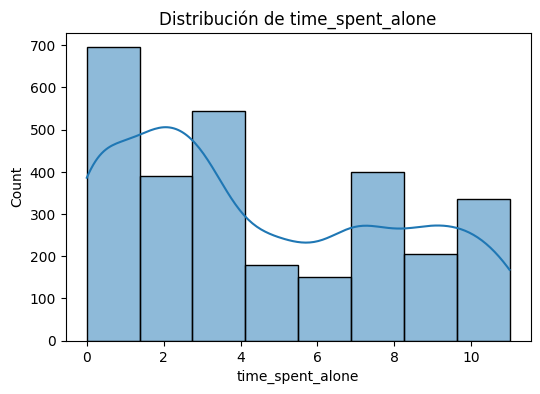

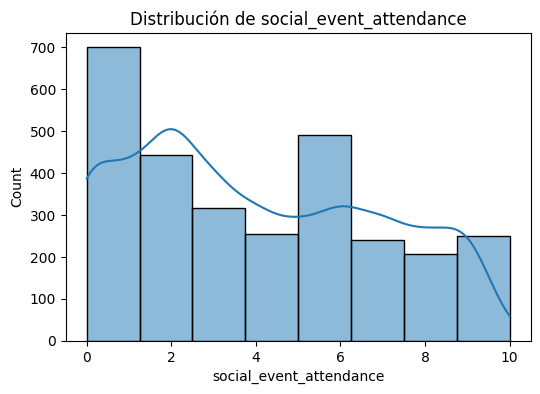

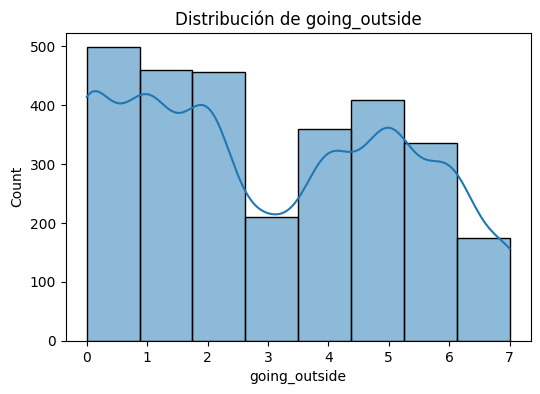

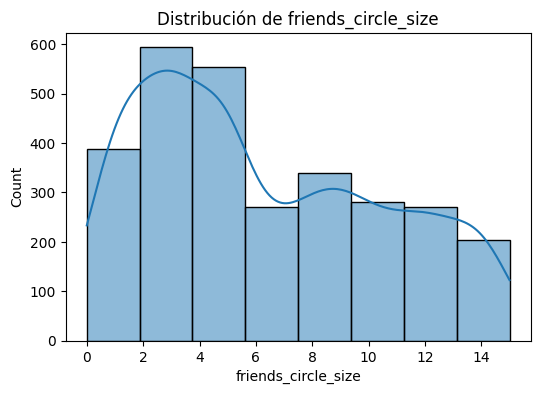

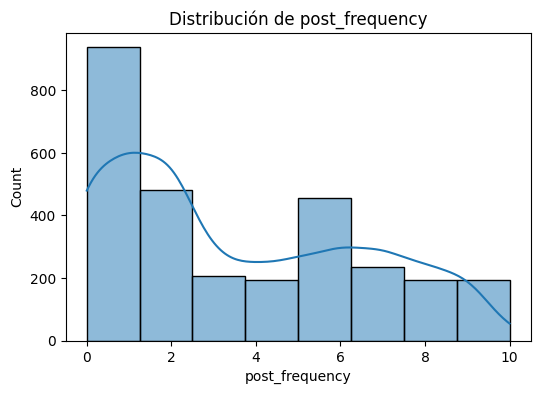

In [50]:
pintar_distrib_num_uni(df,numericas)

#### 4.2 Análisis bivariante

Aquí se analizarán pares de variables para ver su comportamiento en base a otra variable. Las preguntas que se van a responder serán:
- Las personas introvertidas ¿tienen pánico escénico?
- ¿Las personas que más publican en redes sociales son extrovertios o introvertidos? ¿Existen datos atípicos?
- ¿Cuantos amigos tienen las personas que se sienten agotadas después de socializar? ¿Y las que no? 
- ¿Existe alguna relación entre tiempo que pasan a solas y el número de amigos?
- ¿Cuáles son las variables que explican mejor la variable objetivo?

In [51]:
def grafico_barras_categoricas_target(df,categoricas,target):
    for i in categoricas:
        plt.figure(figsize=(7,5))
        sns.countplot(data=df, x=target, hue=i)
        plt.title(f'Distribución de {target} según {i}')
        plt.show()

En cuanto a la respuesta a la primera pregunta podríamos decir que sí, ya que el 94% de las personas introvertidas poseen este aspecto.

In [52]:
df.groupby('personality')['stage_fear'].value_counts(normalize=True)

personality  stage_fear
extrovert    no            0.925553
             yes           0.074447
introvert    yes           0.943932
             no            0.056068
Name: proportion, dtype: float64

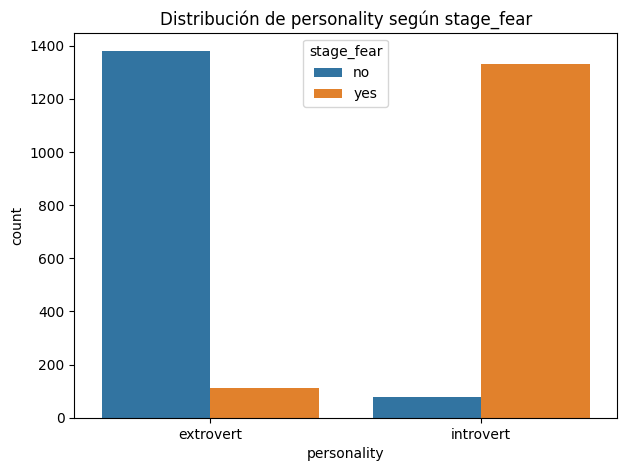

In [53]:
grafico_barras_categoricas_target(df,['stage_fear'],target)

Se observa que la mediana de las publicaciones en redes sociales de las personas introvertidas está en torno a 1, mientras que las extrovertidas es sobre 6. Por lo tanto, las personas extrovertidas tienden a publicar más que las introvertidas. Sin embatrgo, dentro del grupo de introvertidos existen valres atípicos que indican que hay personas que publican de forma más activa lo que refleja una variabilidad de comportamiento para personas con este rasgo de personalidad.

In [54]:
def dibujar_boxplot(df,x,y):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'{y} según {x}')
    plt.xlabel(x)
    plt.ylabel(f'Frecuencia de {y}')
    plt.show()

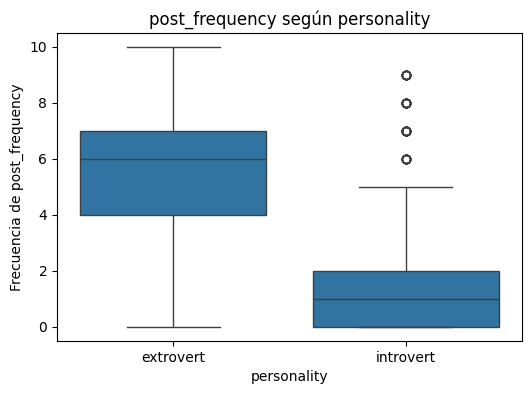

In [55]:
dibujar_boxplot(df,'personality','post_frequency')

De media, las personas que se sienten agotadas después de socializar tienen 3 amigos mientras que aquellos que no llegan hasta los 10 amigos.

In [56]:
(df.groupby('drained_after_socializing')['friends_circle_size'].mean()).round()

drained_after_socializing
no     10.0
yes     3.0
Name: friends_circle_size, dtype: float64

Existe una correlación negativa entre el tiempo que se pasa a solas y la cantidad de amigos que se tiene. Esto significa que a más amigos menos tiempo a solas pasan. Además, podemos acotar que las personas que tienen 5 amigos o menos pasan solos entre 4 y 11 horas mientras que aquellos que poseen más de 5 su tiempo en solitario es mucho menor, menos de 3 horas.

In [57]:
df[['time_spent_alone', 'friends_circle_size']].corr()

,time_spent_alone,friends_circle_size
time_spent_alone,1.000000,-0.718409
friends_circle_size,-0.718409,1.000000


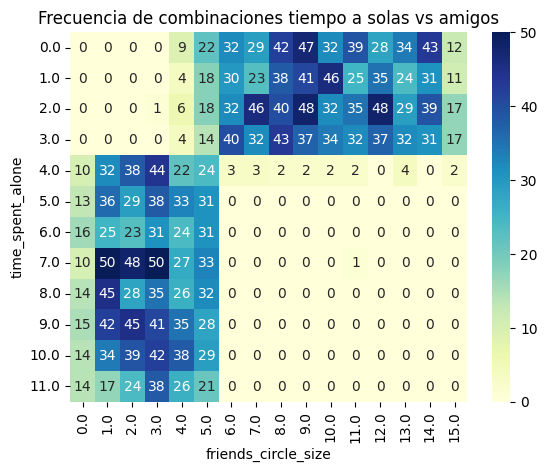

In [58]:
tabla = pd.crosstab(df['time_spent_alone'], df['friends_circle_size'])
sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Frecuencia de combinaciones tiempo a solas vs amigos')
plt.show()

Para identificar qué variables explican mejour la variable objetivo debemos dividirlo entre categóricas y numéricas ya que cada una requiere un análisis diferente.

En el caso de las numéricas se ha optado por el cálculo del p-value mediante t-test y su representación mediante boxplots. Los resultados obtenidos del p-value en todas las variables son próximos a 0. Al ser un valor inferior a 0.05 significa que todas ellas son significativas a la hora de explicar la personalidad. Por otro lado, al representar los diagramas de caja se observa un comportamiento peculiar, mayormente en el grupo de introvertidos ya que presentan valores atípicos menos en el tiempo que pasan a solas. Esto implica que dentro de este grupo hay mucha variabilidad. Sin embargo, el grupo de extrovertidos solo presenta outliers en el tiempo que pasan solos lo cual es lógico porque al ser una investigación hecha a estudiantes lo normal es que pasen más tiempo a solas para dedicarlo a sus tareas lectivas.

En cuanto a las categóricas se han usado tablas de contingencia, gráficos de barras y se ha complementado con la prueba del chi-cuadrado. Al igual que con las numéricas, al obtener el p-value ambas variables presentan un valor de 0 lo que significa que se rechaza la hipótesis nula y por tanto ambas, son variables signifiativas. Además en los gráficos podemos ver como son distribuciones completamente opuestas para introvertidos y extrovertidos, lo cual confirma más que estas variables son significativas.

Por tanto, en este dataset todas las variables están relacionadas con la variable *personality*.

In [59]:
from scipy.stats import ttest_ind, chi2_contingency

In [60]:
def obtener_p_value (df,target,valor1,valor2,columnas):
    for i in columnas:
        target_1 = df[df[target]==valor1][i]
        target_2 = df[df[target]==valor2][i]
        t, p = ttest_ind(target_1, target_2, nan_policy="omit")

        print(f'P-value de {i} = {p}')


In [61]:
obtener_p_value (df,target,'introvert','extrovert',numericas)

P-value de time_spent_alone = 0.0
P-value de social_event_attendance = 0.0
P-value de going_outside = 0.0
P-value de friends_circle_size = 0.0
P-value de post_frequency = 0.0


In [62]:
def dibujar_boxplot(df,target,columnas):
    for i in columnas:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=target, y=i)
        plt.title(f'{i} según {target}')
        plt.xlabel(target)
        plt.ylabel(f'Frecuencia de {i}')
        plt.show()

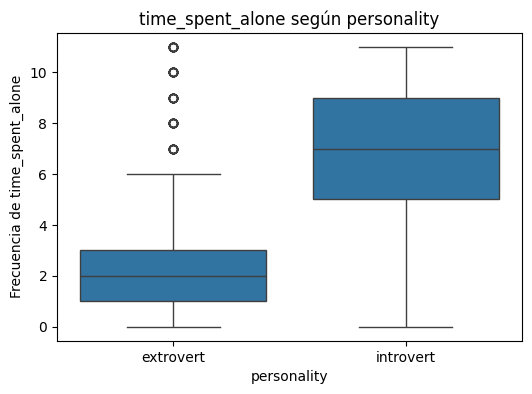

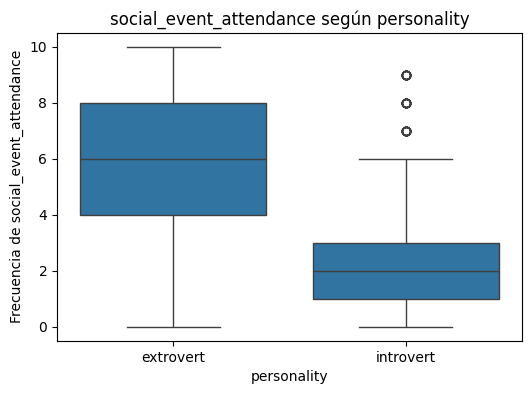

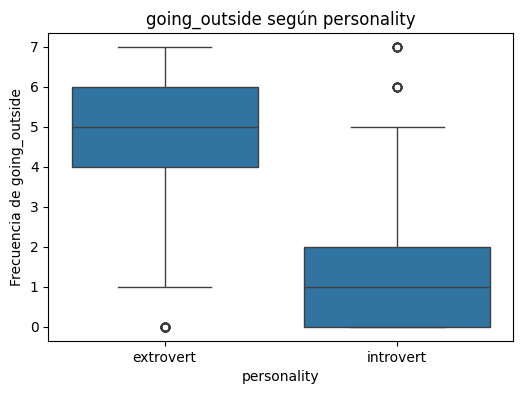

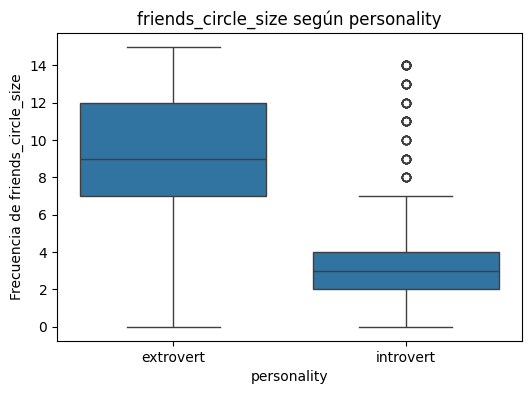

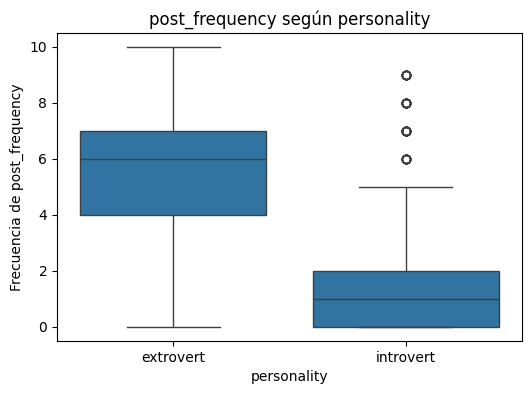

In [63]:
dibujar_boxplot(df,target,numericas)

In [64]:
def calculo_tabla_contingencia_chi2(df,target,columnas):
    for i in columnas:    
        tabla_contingencia = pd.crosstab(df[target], df[i])
        chi2, p_value, d, e = chi2_contingency(tabla_contingencia)

        print (tabla_contingencia)
        print(f'\nP-value de {i} = {p_value}')
        print (f'--------------------------')


In [65]:
calculo_tabla_contingencia_chi2(df,target,categoricas)

stage_fear     no   yes
personality            
extrovert    1380   111
introvert      79  1330

P-value de stage_fear = 0.0
--------------------------
drained_after_socializing    no   yes
personality                          
extrovert                  1380   111
introvert                    79  1330

P-value de drained_after_socializing = 0.0
--------------------------


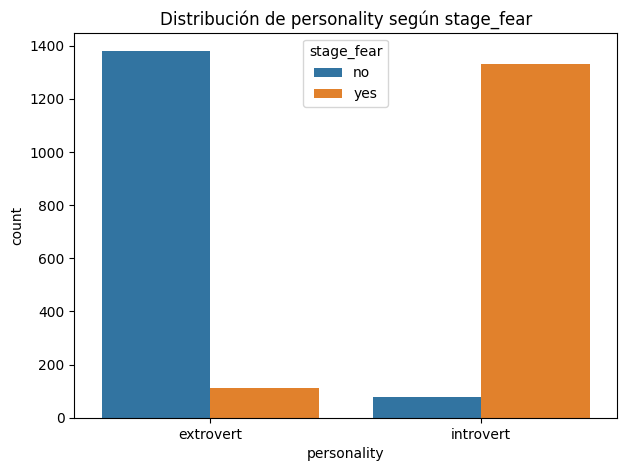

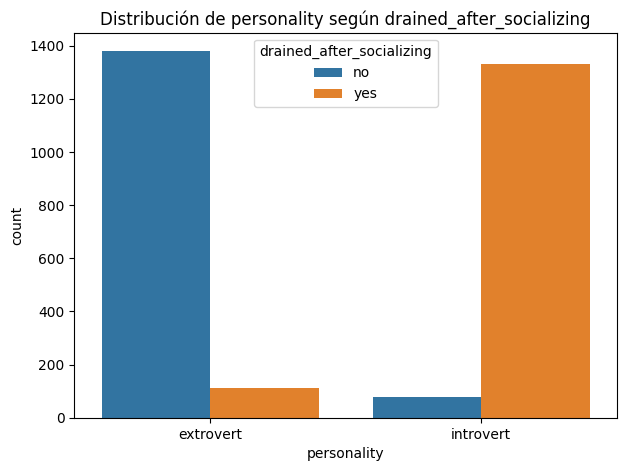

In [66]:
grafico_barras_categoricas_target(df,categoricas,target)

#### 4.3 Análisis multivariante

Por último, el análisis multivariante muestra 
Las preguntas a contestar son:
- ¿Existe algún perfil multivariante, dentro de las variables numéricas, que defina la personalidad de un individuo?
- ¿Cómo se relacionan simultaneamente el tiempo a solas, el número de amigos y la frecuencia de publicaciones?

Para contestar a la primera pregunta se ha realizado tanto un gráfico de barras con las medias de cada grupo de personalidad para las variables numéricas y un pairplot. 
Con ellas observamos diferencias visuales entre grupos pero no se tratan de grupos definidos ya que se debe a que son variables numéricas discretas. Por lo tanto, sí que se pueden ver rasgos representativos de cada personalidad pero no se puede afirmar la existencia de un único perfil multivariante que defina la personalidad.

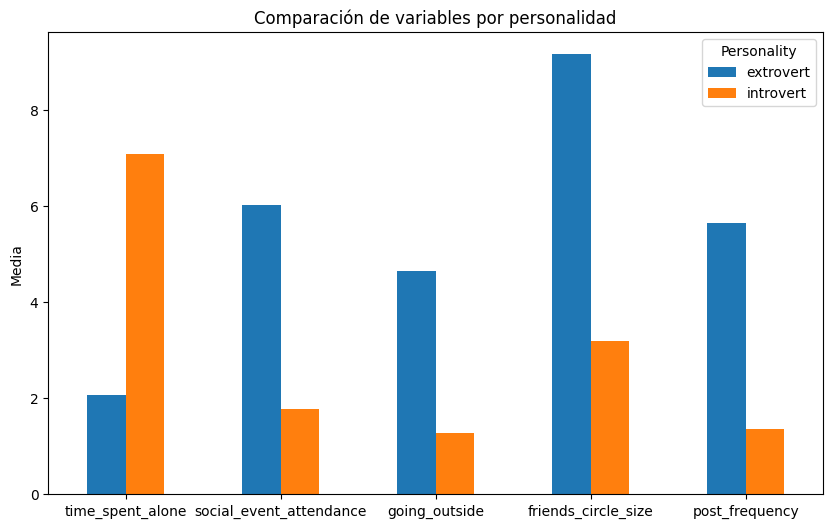

In [68]:
mean_profiles = df.groupby("personality")[numericas].mean().T

mean_profiles.plot(kind="bar", figsize=(10,6))
plt.title("Comparación de variables por personalidad")
plt.ylabel("Media")
plt.xticks(rotation=0)
plt.legend(title="Personality")
plt.show()

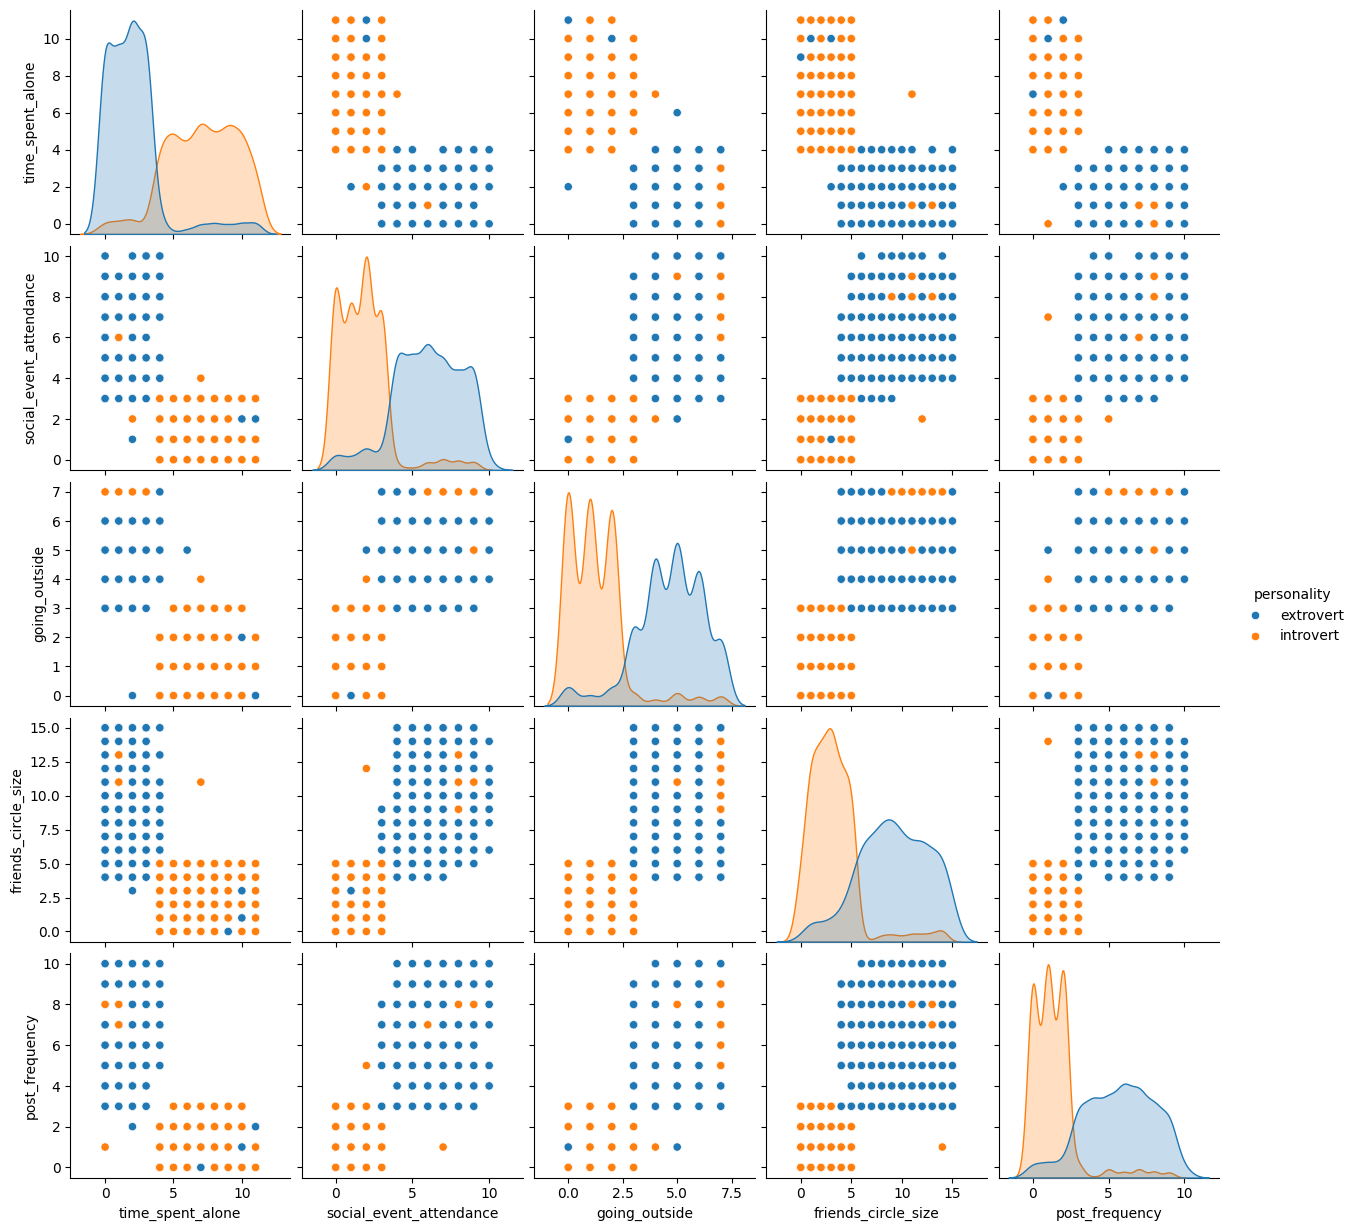

In [67]:
sns.pairplot(df, hue="personality", vars=numericas)
plt.show()

Para analizar como se relacionan simultaniamente las variables *"time_spent_alone", "friends_circle_size", "post_frequency"* se ha utilizado una matriz de correlacion para ver si existen relaciones positivas o negativas entre ellas.

El tiempo que pasa solo esta correlacionado negativamente con el circulo de amigos y la frecuencia de publicar en redes sociales, es decir que cuanto más tiempo pasa sola una persona menos amigos tiene y menos publica en redes sociales. Sin embargo, el círculo de amigos se relaciona  de forma negativa con el tiempo que pasa solo y de forma positiva con la frecuencia de publicaciones lo que implica que una persona con muchos amigos publica más que otra que tiene menos y pasa menos tiempo solo. Del mismo modo le sucede a una persona que genera muchas publicaciones, estas suelen tener más amigos y dedican menos tiempo para estar solas.

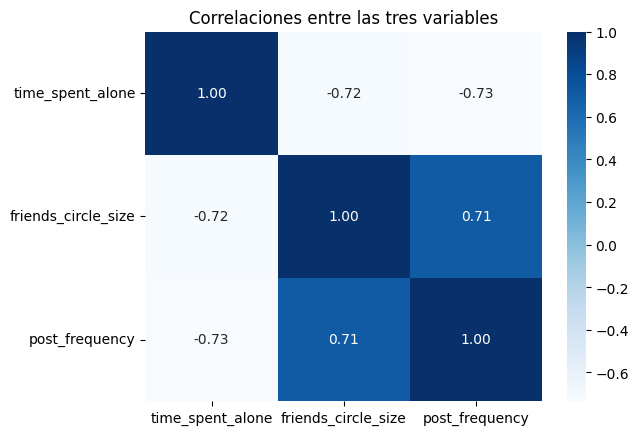

In [72]:
corr = df[["time_spent_alone", "friends_circle_size", "post_frequency"]].corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlaciones entre las tres variables")
plt.show()